In [123]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
alignment_rate_dir = "/Users/johnsolk/Documents/UCDavis/Whitehead/RNAseq_15killifish/evaluation/alignment_rates_comparison/"
alignment_rate_files = os.listdir(alignment_rate_dir)

In [6]:
alignment_rate_files

['STAR_genome_alignmentrates',
 'hisat2_genome_alignmentrate',
 'bwa_genome_alignmentrates',
 'bwa_transcriptome_alignmentrates',
 'salmon_Fhet_alignrates']

In [168]:
salmon_file = alignment_rate_dir + "salmon_Fhet_alignrates"
salmon_data = pd.read_csv(arfile,sep=" ",header=None)
rate = salmon_data[[0,7]]
rate.columns = ['sample_info','perc_info']
rate['salmon_alignment_rate'] = rate.perc_info.str.split('%',n=1,expand=True)[0]
rate['sample'] = rate.sample_info.str.split("/",n=2,expand=True)[1]
df = rate[['sample','salmon_alignment_rate']]
df = df.drop_duplicates(subset='sample', keep='first', inplace=False)
df[['genus','species1','other1','other2']] = df['sample'].str.split('_',expand=True)
df["species"] = df["genus"] + "_" + df["species1"]
df = df[['sample','species','salmon_alignment_rate']]
df[['salmon_alignment_rate']] = df[['salmon_alignment_rate']].astype('float')

/Users/johnsolk/anaconda3/envs/jupyterpy3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/Users/johnsolk/anaconda3/envs/jupyterpy3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [169]:
arranged_x = ['F_heteroclitusMDPL','F_heteroclitusMDPP','F_grandis',
              'F_diaphanus','F_rathbuni','F_catanatus','F_similis',
              'F_notti','F_sciadicus','F_notatus','F_olivaceous',
              'F_chrysotus','A_xenica','F_zebrinus','F_parvapinis','L_parva','L_goodei']

In [170]:
df.species=pd.Categorical(df.species,categories=arranged_x)

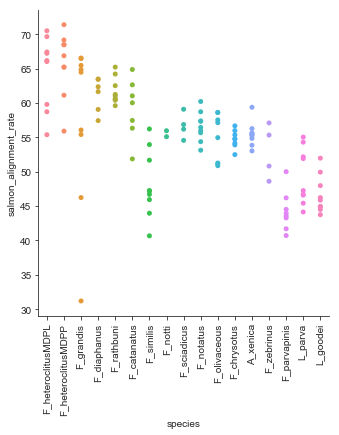

In [171]:
sns.catplot(x="species", y="salmon_alignment_rate", jitter=False, data=df);
plt.xticks(rotation=90);

In [167]:
df.head()

,sample,species,alignment_rate
0,F_catanatus_BW_2.quant,F_catanatus,61.0485
2,F_grandis_BW_1.quant,F_grandis,64.8640
4,F_parvapinis_BW_2.quant,F_parvapinis,44.5263
6,L_parva_FW_1.quant,L_parva,45.4292
8,F_diaphanus_BW_1.quant,F_diaphanus,59.0670
